In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import Alternator, Hug, Hop, MCMC

In [2]:
def normal(D=2, mu=0, sigma=1):
    with numpyro.plate('D', D):
        theta = numpyro.sample('theta', dist.Normal(mu, sigma))

In [3]:
hug = Hug(normal, step_size=1, trajectory_length=1)
lam = 2
hop = Hop(normal, lam=lam, mu=np.sqrt(0.5 * lam))
kernel = Alternator(hug, hop)

In [4]:
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, D=2, mu=1, sigma=1, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:01<00:00, 730.03it/s]


In [5]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[1.8784723 , 2.16736   ],
              [1.1868122 , 2.2092304 ],
              [0.7090209 , 2.1884732 ],
              ...,
              [1.3239353 , 0.8842447 ],
              [0.6751253 , 0.88690805],
              [0.6751253 , 0.88690805]], dtype=float32)}

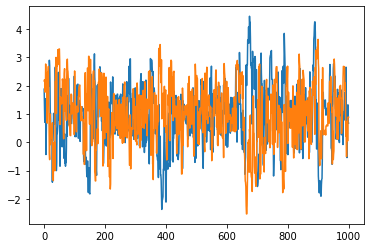

In [6]:
plt.plot(samples["theta"])

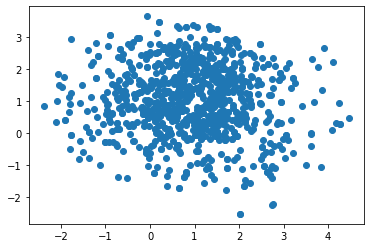

In [7]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

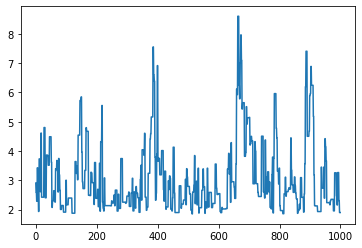

In [8]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

(array([133.,  25.,  21.,  21.,  15.,  14.,  20.,  14.,  29., 708.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

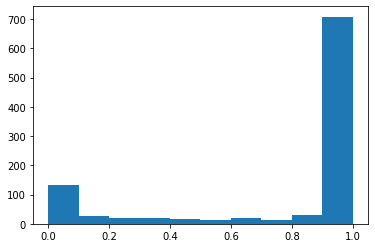

In [9]:
plt.hist(ap)